## Forecasting Credit Ratings of Corporations using Random Forest Model
This Python script presents a Random Forest Classifier model designed to forecast credit ratings for corporations based on a curated dataset obtained from a SQLite database. The model employs ensemble learning techniques to analyze a range of features and accurately predict binary credit ratings.

### Data Preprocessing

The initial steps involve loading and preprocessing the data, including extracting relevant tables ('clean' and 'dummies') from the database. The 'clean' table provides essential features for modeling, while the 'dummies' table incorporates dummy variables for categorical data representation.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
from joblib import dump, load



In [2]:
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)

connection.close()

### Model Building
After defining the features set and target vector, the dataset is split into training and testing sets for model evaluation. Standard scaling is applied to ensure consistent feature scaling across the dataset. A Random Forest Classifier with 500 decision trees is then trained on the scaled training data to capture complex relationships and patterns within the data.

In [3]:
# define the model and dataframes used

model = 1
data_frame = clean
# Define features set
X = data_frame.copy()
X = X.drop(columns=['Binary Rating'])

# Define target vector
y = data_frame["Binary Rating"].values.ravel()

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


# Save the model
dump(rf_model, f'../models/random_forest/model{model}.joblib')


['../models/random_forest/model1.joblib']

### Model Evaluation
The model's performance is evaluated using standard metrics such as confusion matrix, accuracy score, and classification report. These metrics provide insights into the model's predictive capabilities and its effectiveness in forecasting credit ratings for corporations.

In [4]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [5]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,606,97
Actual 1,48,1201


Accuracy Score : 0.9257172131147541
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       703
           1       0.93      0.96      0.94      1249

    accuracy                           0.93      1952
   macro avg       0.93      0.91      0.92      1952
weighted avg       0.93      0.93      0.93      1952



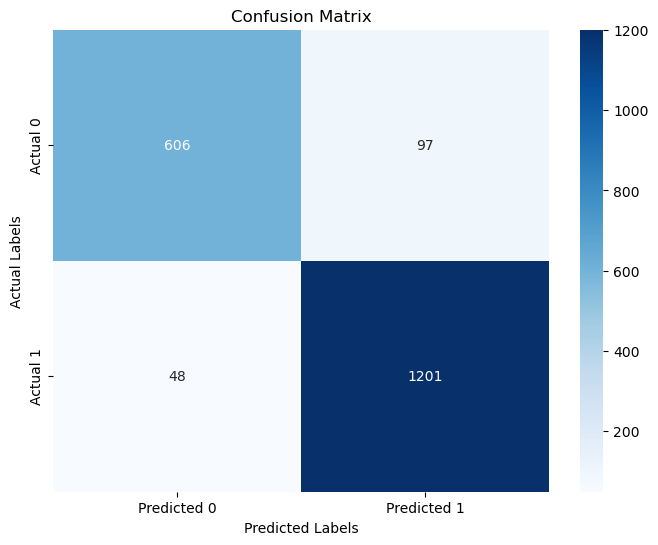

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       703
           1       0.93      0.96      0.94      1249

    accuracy                           0.93      1952
   macro avg       0.93      0.91      0.92      1952
weighted avg       0.93      0.93      0.93      1952



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming cm_df is your confusion matrix DataFrame
# Assuming y_test and predictions are your actual and predicted labels

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.savefig('../img/models/random_forest/confusionMatrix.png')
plt.show()

# Displaying Classification Report
print("Classification Report")
print(classification_report(y_test, predictions))


### Feature Importance Analysis
Additionally, the script conducts a feature importance analysis using the trained Random Forest model. This analysis ranks the features based on their contribution to the prediction, providing valuable insights into the factors driving credit ratings for corporations.

By leveraging advanced machine learning techniques and thorough data preprocessing, this Random Forest model offers a reliable approach to forecast credit ratings, aiding financial institutions and analysts in making informed decisions and managing credit risk effectively.

In [7]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.09497732092477876, 'Pre-Tax Profit Margin'),
 (0.09085031699005001, 'Long-term Debt / Capital'),
 (0.09039535962911724, 'ROI - Return On Investment'),
 (0.06680558875141296, 'ROE - Return On Equity'),
 (0.06668913298124911, 'Current Ratio'),
 (0.06527519511677976, 'Debt/Equity Ratio'),
 (0.06492892645268822, 'Net Profit Margin'),
 (0.06170226949448155, 'ROA - Return On Assets'),
 (0.05109270600596449, 'Rating Agency'),
 (0.04728693396959308, 'EBITDA Margin'),
 (0.046126116009264716, 'Gross Margin'),
 (0.04359511145073509, 'Asset Turnover'),
 (0.04049727257785787, 'EBIT Margin'),
 (0.038047131243843235, 'Return On Tangible Equity'),
 (0.037943612988199545, 'Operating Margin'),
 (0.032128617500024464, 'Sector'),
 (0.031232116553828626, 'Operating Cash Flow Per Share'),
 (0.030426271360131416, 'Free Cash Flow Per Share')]

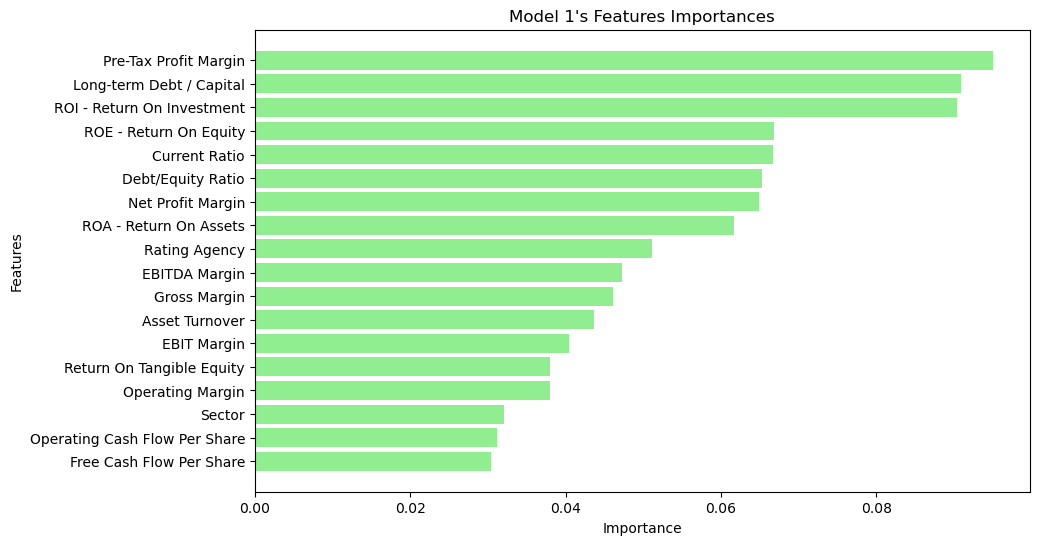

In [8]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
# importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)


plt.figure(figsize=(10, 6))
plt.barh(importances_sorted.index, importances_sorted['Feature Importances'], color='lightgreen')
plt.title(f"Model {model}'s Features Importances")
plt.xlabel('Importance')
plt.ylabel('Features')

plt.savefig(f'../img/models/random_forest/model{model}_importances_plot.png', bbox_inches='tight')

plt.show()

In [9]:
from sklearn.tree import export_graphviz
import graphviz

# Selecting a single tree from the random forest
single_tree = rf_model.estimators_[0]

# Export the selected tree 
dot_data = export_graphviz(single_tree, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['Class 0', 'Class 1'], 
                           filled=True, rounded=True, 
                           special_characters=True)

# Save it, display it
graph = graphviz.Source(dot_data)

graph.view(filename='../img/models/random_forest/random_tree')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH